# lab5 实验报告

姓名:李广泓 学号:16369031 学院:资讯管理学院 专业: 信息管理与信息系统

# 实验目的

* 学习使用Python访问Baidu Web的API, 以及sklearn的GMM模型

## 实验步骤

### 获取百度地图数据

In [36]:
def geoGrab():
    import json  
    import urllib.request 
    j=0
    f=open(r'Restaurant_Data_Beijing.txt','w') 
    for j in range (0,5):
        a = 'http://api.map.baidu.com/place/v2/search?q=%E9%A5%AD%E5%BA%97&page_size=20&page_num='
        b = '&region=%E5%8C%97%E4%BA%AC&output=json&ak=SaG5y6eI888RC0tLrk5O73XVfpcmdiKg'
        #上面的汉字(百分号部分)做了urlencode处理，原本是”饭店”和”北京”
        #密钥需要自己申请，然后替换掉上面的“秘钥”
        c =str(j)
        url=a+c+b
        j=j+1
        #url='http://api.map.baidu.com/place/v2/search?q=%E9%A5%AD%E5%BA%97&page_size=20'+
        #'&page_num=19&region=%E5%8C%97%E4%BA%AC&output=json&ak=qUPyb0ZPGmT41cL9L5irQzcnc48yIEck'
        temp=urllib.request.urlopen(url) 
             
        #把字符串解析成为Python对象
        hjson = json.loads(temp.read().decode('utf-8'))
        i=0
        for i in range (0,1):
            lat=hjson['results'][i]['location']['lat']
            lng=hjson['results'][i]['location']['lng']
            print ('%s\t%f\t' % (lat,lng))
            f.write('%s\t%f\t\n' % (lat,lng))
            i=i+1
    f.close()
geoGrab()

39.999823	116.337129	
39.930828	116.386323	
39.907596	116.669027	
39.913481	116.669950	
40.070405	116.423010	


### 使用sklearn中的GMM模型聚类

In [2]:
import numpy as np
def load_data(file_name):
    f = open(file_name,'r')
    data = f.readlines()
    f.close()
    feature_list = []
    for line in data:
        tmp = list(map(float, line.split('\t')[0:2]))
        feature_list.append([tmp[0],tmp[1]])
    features = np.array(feature_list)
    print("Shape: %s"%str(features.shape))
    return features

In [3]:
sample=load_data('Restaurant_Data_Beijing.txt')

Shape: (400, 2)


In [4]:
print(sample[:5])

[[ 39.915769 116.434797]
 [ 39.915302 116.416703]
 [ 39.977517 116.344784]
 [ 39.995559 116.39352 ]
 [ 39.959371 116.287243]]


In [5]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4, covariance_type='tied')

In [6]:
result=gmm.fit(sample)

In [7]:
label=gmm.predict(sample)

In [8]:
center=gmm.means_
print("center:",center)
print("result:",result)
print("label:",label)

center: [[ 39.92794947 116.39166015]
 [ 40.659145   117.23369795]
 [ 40.49900223 116.84924278]
 [ 40.23643062 117.13075845]]
result: GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 2 0 2 3 1 0 0 0 1 0 0 0 3 0 0 2 2 0 0 1 0 0 0 2 3 0 1 0 2 0 0 0 0
 2 1 3 0 2 2 0 2 2 1 1 1 2 0 3 2 3 2 0 3 1 2 0 0 2 3 0 2 2 2 0 2 2 3 2 2 3
 1 1 1 1 0 3 2 3 0 2 2 0 0 2 2 1 2 3 2 3 3 3 3 3 2 0 0

## 操作练习

### 对聚类结果可视化

In [9]:
sample[0]

array([ 39.915769, 116.434797])

In [13]:
classes = []
for i in np.unique(label):
    classes.append(sample[label == i])
print(classes[0][:5])

[[ 39.915769 116.434797]
 [ 39.915302 116.416703]
 [ 39.977517 116.344784]
 [ 39.995559 116.39352 ]
 [ 39.959371 116.287243]]


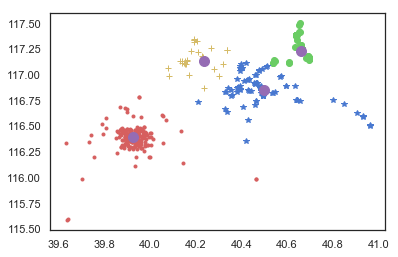

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True) 
plt.plot(classes[0][:, 0], classes[0][:, 1], 'r.')
plt.plot(classes[1][:, 0], classes[1][:, 1], 'go')
plt.plot(classes[2][:, 0], classes[2][:, 1], 'b*')
plt.plot(classes[3][:, 0], classes[3][:, 1], 'y+')
plt.plot(center[:, 0], center[:, 1], 'mo', markersize=10)
plt.show()

### 尝试使用kMeans聚类

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(sample)
result = kmeans.predict(sample)
center = kmeans.cluster_centers_

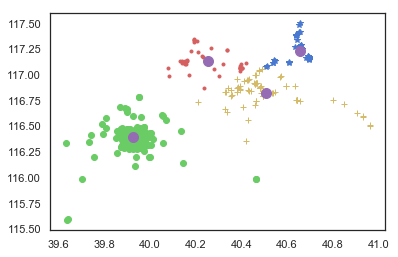

In [28]:
class1 = []
for i in np.unique(result):
    class1.append(sample[result == i])
plt.plot(class1[0][:, 0], class1[0][:, 1], 'r.')
plt.plot(class1[1][:, 0], class1[1][:, 1], 'go')
plt.plot(class1[2][:, 0], class1[2][:, 1], 'b*')
plt.plot(class1[3][:, 0], class1[3][:, 1], 'y+')
plt.plot(center[:, 0], center[:, 1], 'mo', markersize=10)
plt.show()

### 尝试使用DBSCAN聚类

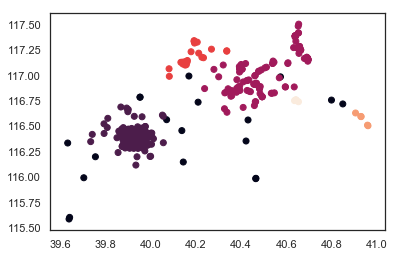

In [33]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps = 0.1, min_samples=5, algorithm='auto').fit_predict(sample)
plt.scatter(sample[:, 0], sample[:, 1], c=y_pred)
plt.show()